### Problem Statement

Zinapay bank wants to gain insights into customer behavior, financial standing, and engagement patterns which would lead to better decision making. 

### Objective

` Overall `

- Generate insights on customer behavior, financial standings and engagement patterns

`Drill down`

- Understand the demographic and financial characteristics of the customers

- Identify trends and patterns in customer engagement

- Examine reasons for customer churn 


###  Approach

To achieve this, we are going to approach the analysis using the CRISP-DM (Cross-Industry Standard Process for Data Mining) Framework  

- Properly understand the business and data

- Prepare the data for analysis

-  Answer questions to help us achieve our objectives

- Draw conclusions

- Prepare a summary 


#### 1. Data Understanding/Exploration

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings

plt.figure(figsize=(20,10)).patch.set_facecolor('none')
%matplotlib inline

warnings.filterwarnings("ignore")

<Figure size 2000x1000 with 0 Axes>

In [3]:
cus_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name='Customer_Info')

In [4]:
cus_df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88
1,15647311,Hill,608,Spain,Female,41.0,1,€112542.58
2,15619304,Onio,502,French,Female,42.0,8,€113931.57
3,15701354,Boni,699,FRA,Female,39.0,1,€93826.63
4,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1


In [5]:
cus_df.shape

(10001, 8)

In [6]:
acct_df = pd.read_excel('Bank_Churn_Messy.xlsx', sheet_name='Account_Info')

In [7]:
acct_df.head()

,CustomerId,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,€0.0,1,Yes,2,Yes,1
1,15634602,€0.0,1,Yes,2,Yes,1
2,15647311,€83807.86,1,Yes,1,Yes,0
3,15619304,€159660.8,3,No,8,No,1
4,15701354,€0.0,2,No,1,No,0


In [8]:
acct_df.shape

(10002, 7)

In [9]:
# prioritize the left table -There is a one to many relationship between customer and account. A customer can have one or many accounts
df = cus_df.merge(acct_df, how='left', on='CustomerId')

In [10]:
df.shape

(10004, 14)

In [11]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [12]:
df.tail()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1
10000,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10001,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10002,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0
10003,15628319,Walker,792,French,Female,28.0,4,€38190.78,€130142.79,1,No,4,No,0


The merge resulted in duplicate rows and we now have two tenure columns 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


Issues with the data:

- Age and Surname column has null values
- Tenure_x and Tenure_y are the same columns
- There are duplicates
- Estimated salary and balance should be number data types
- Exited should be an object
- Age should be an integer

#### 2 Data Cleaning

In [14]:
df.drop('Tenure_x', axis=1, inplace=True)

In [15]:
df.rename(columns = {'Tenure_y': 'Tenure'}, inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   EstimatedSalary  10004 non-null  object 
 7   Balance          10004 non-null  object 
 8   NumOfProducts    10004 non-null  int64  
 9   HasCrCard        10004 non-null  object 
 10  Tenure           10004 non-null  int64  
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


In [17]:
df.duplicated().sum()

4

In [18]:
df = df.drop_duplicates()

In [19]:
df.duplicated().sum()

0

In [20]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,€93826.63,€0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,€79084.1,€125510.82,1,Yes,2,Yes,0


In [21]:
df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure             0
IsActiveMember     0
Exited             0
dtype: int64

In [22]:
# check the rows where surname is null
df[df['Surname'].isnull()]

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
29,15728693,NaN,574,Germany,Female,NaN,-€999999,€141349.43,1,Yes,3,Yes,0
122,15580203,NaN,674,Spain,Male,NaN,-€999999,€120193.42,1,No,6,No,0
9390,15756954,NaN,538,France,Female,NaN,-€999999,€0.0,1,Yes,2,Yes,0


The rows where surname and age is null have an estimated salary that is negative. It is best to drop the rows

In [23]:
df.dropna(axis=0, inplace=True)

In [24]:
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
Tenure             0
IsActiveMember     0
Exited             0
dtype: int64

In [25]:
df.shape

(9997, 13)

In [26]:
# Confirm the same currency unit is used 

df[['Geography', 'Balance']]

,Geography,Balance
0,FRA,€0.0
2,Spain,€83807.86
3,French,€159660.8
4,FRA,€0.0
5,Spain,€125510.82
...,...,...
9996,France,€0.0
9997,French,€57369.61
9998,FRA,€0.0
9999,Germany,€75075.31


In [27]:
## clean up estimated salary and balance columns

df['EstimatedSalary'] = df['EstimatedSalary'].str.replace('€', '')
df['Balance'] = df['Balance'].str.replace('€', '')

In [28]:
# remove whitespaces

df['EstimatedSalary'] = df['EstimatedSalary'].str.strip()
df['Balance'] = df['Balance'].str.strip()

In [29]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,101348.88,0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,112542.58,83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,113931.57,159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,93826.63,0.0,2,No,1,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,79084.1,125510.82,1,Yes,2,Yes,0


In [30]:
## create a function to handle conversion from one type to another

def change_type(column: str, new_data_type:str, data):
    data[column] = data[column].astype(new_data_type)

In [31]:
change_type('EstimatedSalary', 'float64', df)
change_type('Balance', 'float64', df)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   float64
 6   EstimatedSalary  9997 non-null   float64
 7   Balance          9997 non-null   float64
 8   NumOfProducts    9997 non-null   int64  
 9   HasCrCard        9997 non-null   object 
 10  Tenure           9997 non-null   int64  
 11  IsActiveMember   9997 non-null   object 
 12  Exited           9997 non-null   int64  
dtypes: float64(3), int64(5), object(5)
memory usage: 1.1+ MB


In [33]:
# clean up exited and age

change_type('Age', 'int32', df)
change_type('Exited', 'str', df)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9997 entries, 0 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       9997 non-null   int64  
 1   Surname          9997 non-null   object 
 2   CreditScore      9997 non-null   int64  
 3   Geography        9997 non-null   object 
 4   Gender           9997 non-null   object 
 5   Age              9997 non-null   int32  
 6   EstimatedSalary  9997 non-null   float64
 7   Balance          9997 non-null   float64
 8   NumOfProducts    9997 non-null   int64  
 9   HasCrCard        9997 non-null   object 
 10  Tenure           9997 non-null   int64  
 11  IsActiveMember   9997 non-null   object 
 12  Exited           9997 non-null   object 
dtypes: float64(2), int32(1), int64(4), object(6)
memory usage: 1.0+ MB


In [35]:
## export cleaned data

df.to_csv('Cleaned_bank_customer_data.csv')

#### 4. Data Exploration/Transformation

In [36]:
# seperate numerical from categorical to ease exploration

cat_columns = [i for i in df.select_dtypes(include=['object']).columns]
num_columns = [i for i in df.select_dtypes(include=['int64', 'float64']).columns]

In [37]:
cat_columns

['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember', 'Exited']

In [38]:
num_columns

['CustomerId',
 'CreditScore',
 'EstimatedSalary',
 'Balance',
 'NumOfProducts',
 'Tenure']

In [39]:
df.describe()

,CustomerId,CreditScore,Age,EstimatedSalary,Balance,NumOfProducts,Tenure
count,9.997000e+03,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000,9997.000000
mean,1.569094e+07,650.545364,38.922077,100092.222656,76482.679807,1.530359,5.013204
std,7.193443e+04,96.657932,10.489072,57518.775702,62397.174721,0.581669,2.892364
min,1.556570e+07,350.000000,18.000000,11.580000,0.000000,1.000000,0.000000
25%,1.562853e+07,584.000000,32.000000,50974.570000,0.000000,1.000000,3.000000
50%,1.569073e+07,652.000000,37.000000,100236.020000,97188.620000,1.000000,5.000000
75%,1.575323e+07,718.000000,44.000000,149399.700000,127642.440000,2.000000,7.000000
max,1.581569e+07,850.000000,92.000000,199992.480000,250898.090000,4.000000,10.000000


In [68]:
## let's categorize credit score and age to ease analysis

def categorize_credit_score(value):
    if value <= 579:
        return 'Poor'
    elif value >= 580 and value <= 669:
        return 'Fair'
    elif value >= 670 and value <= 739:
        return 'Good'
    elif value >= 740 and value <= 799:
        return 'Very Good'
    else:
        return 'Excellent'

def categorize_age(value):
    if value < 18:
        return 'child'
    elif value >= 18 and value <= 30:
        return 'young adult'
    elif value > 30 and value < 60:
        return 'youth'
    else:
        return 'old'

In [69]:
df['Credit Score Category'] = df['CreditScore'].apply(categorize_credit_score)
df['Age Bin'] = df['Age'].apply(categorize_age)

In [42]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Credit Score Category,Age Bin
0,15634602,Hargrave,619,FRA,Female,42,101348.88,0.00,1,Yes,2,Yes,1,Fair,youth
2,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,0,Fair,youth
3,15619304,Onio,502,French,Female,42,113931.57,159660.80,3,No,8,No,1,Poor,youth
4,15701354,Boni,699,FRA,Female,39,93826.63,0.00,2,No,1,No,0,Good,youth
5,15737888,Mitchell,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,0,Excellent,youth


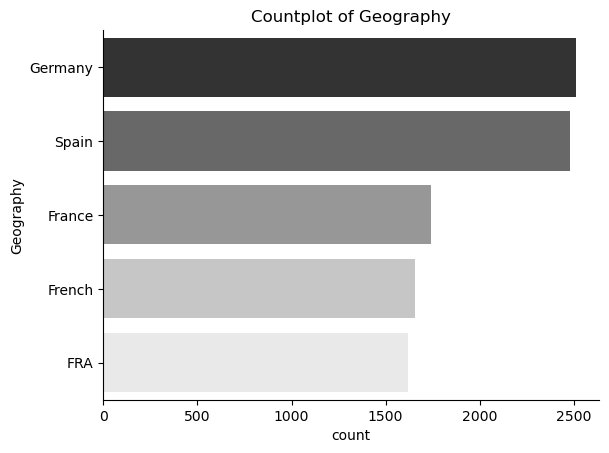

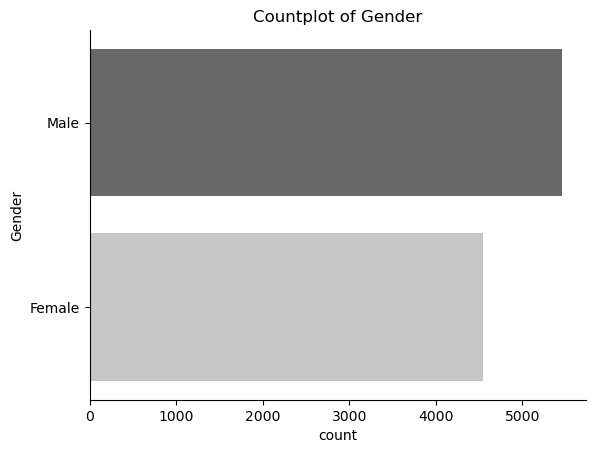

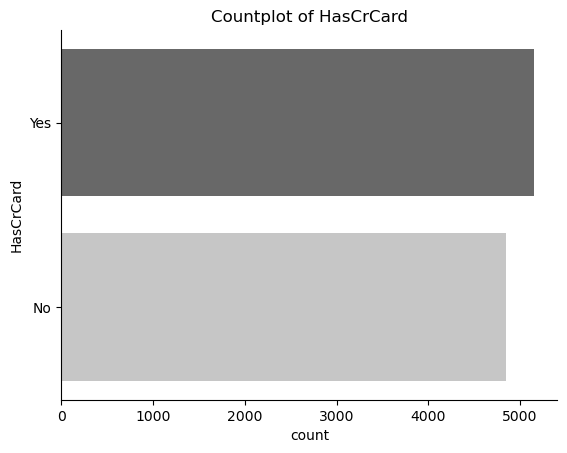

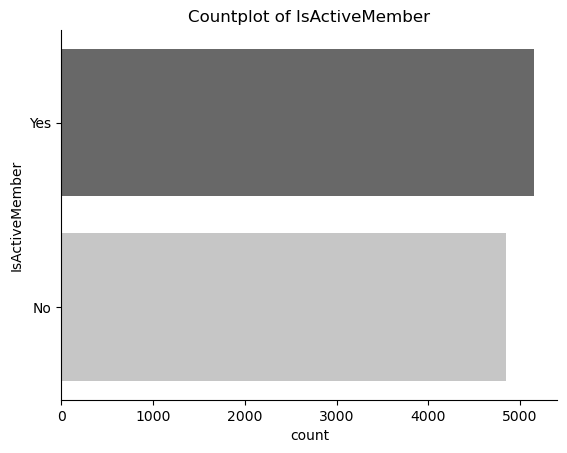

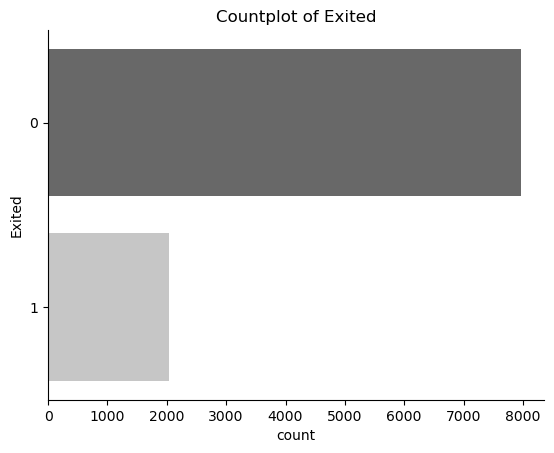

In [43]:
## Distribution of categories 

for column in cat_columns[1:]:
    sorted_categories = df[column].value_counts().index
    sb.countplot(y=column, data=df, order=sorted_categories, palette='Greys_r') 
    sb.despine()
    plt.title(f'Countplot of {column}')
    plt.show()

In [44]:
df['Geography'].value_counts()

Geography
Germany    2508
Spain      2476
France     1740
French     1655
FRA        1618
Name: count, dtype: int64

- We should have 3 countries but there are 5 indicating inconsistency

- Exited should have boolean values not 0 and 1

In [45]:
df['Geography'] = df['Geography'].str.replace('FRA', 'France').replace('French', 'France')

In [46]:
df['Geography'].value_counts()

Geography
France     5013
Germany    2508
Spain      2476
Name: count, dtype: int64

In [47]:
df['Exited'] = df['Exited'].str.replace('0', 'No').replace('1', 'Yes')

In [48]:
df['Exited'].value_counts()

Exited
No     7960
Yes    2037
Name: count, dtype: int64

After we removed the unit of currency from balance and estimated salary, we forget to add it to the column names

In [50]:
df.rename(columns={
    'EstimatedSalary' : 'Estimated Salary (€)',
    'Balance' : 'Balance (€)'
}, inplace=True)

In [51]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Estimated Salary (€),Balance (€),NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Credit Score Category,Age Bin
0,15634602,Hargrave,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,Yes,Fair,youth
2,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,No,Fair,youth
3,15619304,Onio,502,France,Female,42,113931.57,159660.80,3,No,8,No,Yes,Poor,youth
4,15701354,Boni,699,France,Female,39,93826.63,0.00,2,No,1,No,No,Good,youth
5,15737888,Mitchell,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,No,Excellent,youth


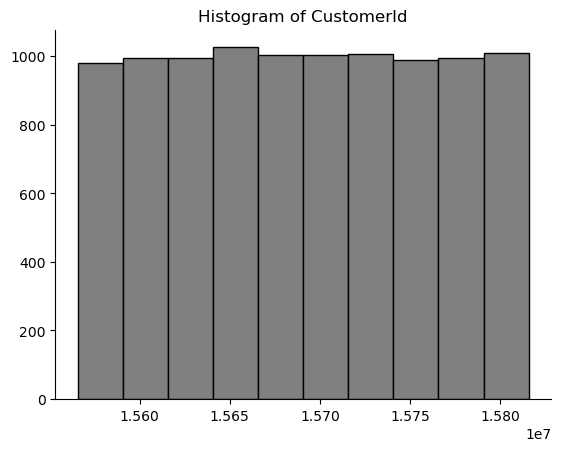

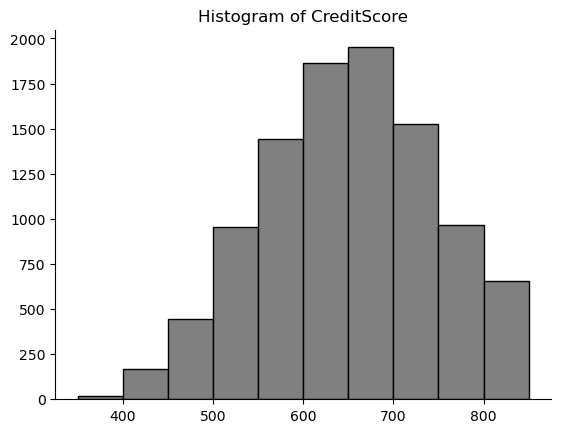

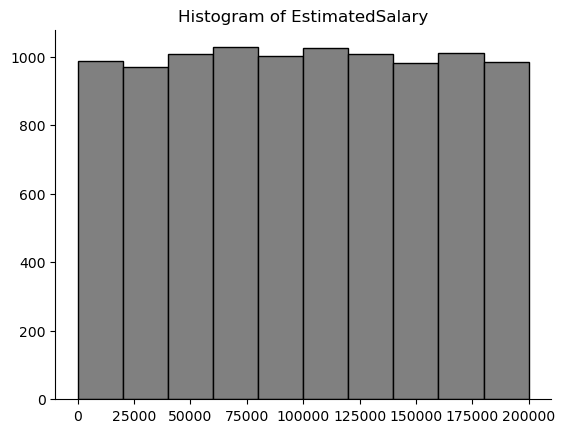

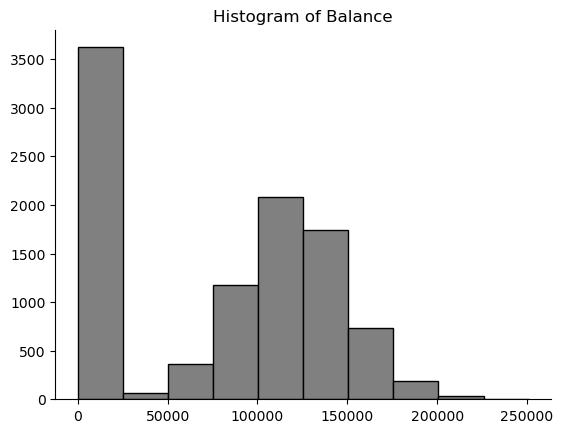

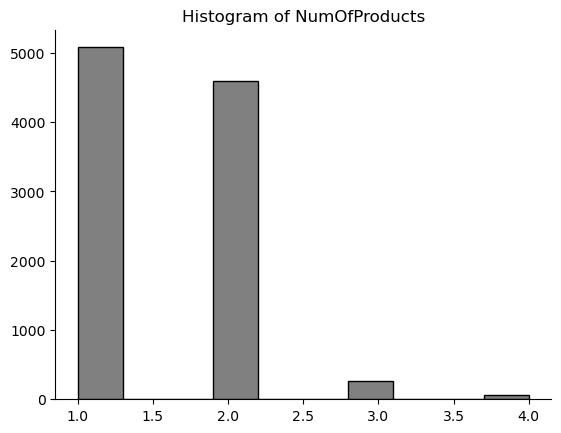

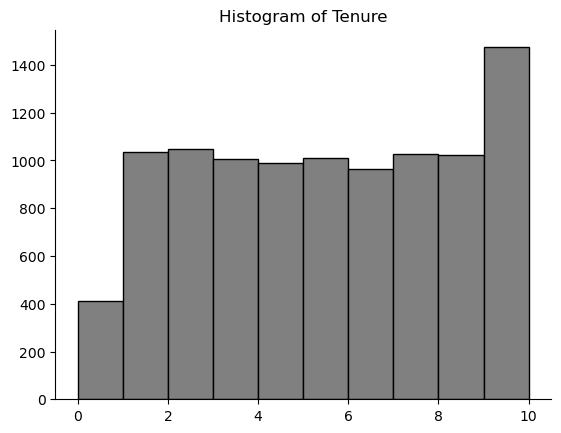

In [49]:
# Density/histogram plot of each numerical column

for column in num_columns:
    plt.hist(df[column], color='grey', edgecolor='black')
    plt.title(f'Histogram of {column}')
    sb.despine()
    plt.show()

- Credit score, Balance follows a normal distribution

- Tenure, Estimated Salary follows a uniform distribution

### Data Analysis

In [52]:
### Helper functions 

def plot_pie(data, labels, title):
    plt.pie(data, labels=labels, autopct='%.0f%%')
    plt.title(f'{title}')
    sb.despine()
    plt.show()
    
plt.figure(figsize=(20,10))

def generate_bar_plot(x,y,xlabel, ylabel):
    plt.bar(x, y, color='grey', edgecolor='black')
    plt.title(f'Plot of {ylabel} vs {xlabel}')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.despine()
    plt.show()
    
def generate_line_chart(x, y, xlabel,ylabel,data,color='grey',estimator=sum):
    sb.lineplot(x=x,y=y,markers=True, dashes=False, data=data,estimator=estimator, color=color)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(f'Plot of {ylabel} with changes in {xlabel}')
    sb.despine()
    plt.show()
    
def get_bar_chart_label(df, title, xlabel, ylabel):
    df.plot(kind='bar')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    sb.despine()
    plt.show()
    
    for location in plt.gca().containers:
        plt.gca().bar_label (location, label_type='edge') 
        plt.xticks(rotation=0)
        plt.legend (title =title)
        plt. show()
    

<Figure size 2000x1000 with 0 Axes>

####  1 Demographic and financial characteristics of the customers

1. No of customers across the different countries

In [53]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Estimated Salary (€),Balance (€),NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Credit Score Category,Age Bin
0,15634602,Hargrave,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,Yes,Fair,youth
2,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,No,Fair,youth
3,15619304,Onio,502,France,Female,42,113931.57,159660.80,3,No,8,No,Yes,Poor,youth
4,15701354,Boni,699,France,Female,39,93826.63,0.00,2,No,1,No,No,Good,youth
5,15737888,Mitchell,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,No,Excellent,youth


In [54]:
result_countries = df.groupby('Geography', as_index=False)[['CustomerId']].count()

result_countries

,Geography,CustomerId
0,France,5013
1,Germany,2508
2,Spain,2476


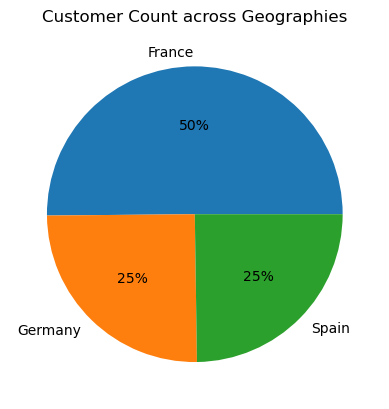

In [55]:
plot_pie(result_countries['CustomerId'], result_countries.Geography, 'Customer Count across Geographies')

`Observation` : Half of our customers come from France while the remaining half is spread between Germany and Spain


Distribution of Estimated Salary and Balance across the countries

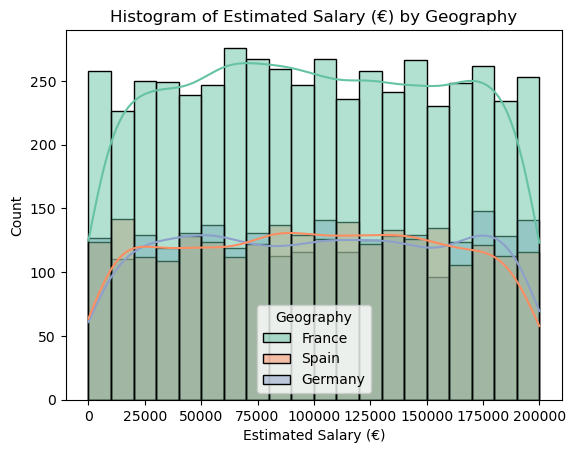

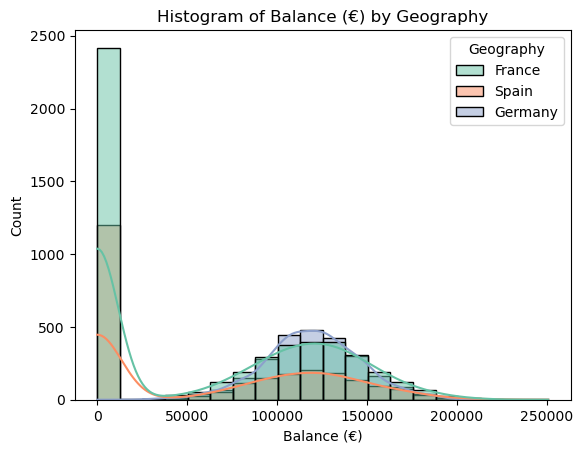

In [56]:
columns = ['Estimated Salary (€)', 'Balance (€)']

for col in columns:
    sb.histplot(data=df, x=col, hue='Geography', kde=True, palette='Set2', edgecolor='black', bins=20)
    plt.title(f'Histogram of {col} by Geography')
    plt.show()

In [57]:
agg_salary = df.groupby(['Geography'], as_index=False)['Estimated Salary (€)'].agg(['min', 'max', 'sum', 'mean'])
agg_salary = agg_salary.rename(columns={'min' : 'Min Salary', 'max' : 'Max Salary', 'sum' : 'Total Salary', 'mean': 'Average Salary'})
agg_salary

,Geography,Min Salary,Max Salary,Total Salary,Average Salary
0,France,90.07,199929.17,5.008144e+08,99903.124289
1,Germany,11.58,199970.74,2.535934e+08,101113.804322
2,Spain,417.41,199992.48,2.462142e+08,99440.293453


In [58]:
agg_balance = df.groupby(['Geography'], as_index=False)['Balance (€)'].agg(['min', 'max', 'sum', 'mean'])
agg_balance = agg_balance.rename(columns={'min' : 'Min Balance', 'max' : 'Max Balance', 'sum' : 'Total Balance', 'mean': 'Average Balance'})
agg_balance

,Geography,Min Balance,Max Balance,Total Balance,Average Balance
0,France,0.00,238387.56,3.113325e+08,62105.022839
1,Germany,27288.43,214346.96,3.002615e+08,119721.495993
2,Spain,0.00,250898.09,1.530034e+08,61794.571321


In [59]:
# Merge both dataframes
agg_comb = agg_salary.merge(agg_balance, how='inner', on='Geography')
agg_comb


,Geography,Min Salary,Max Salary,Total Salary,Average Salary,Min Balance,Max Balance,Total Balance,Average Balance
0,France,90.07,199929.17,5.008144e+08,99903.124289,0.00,238387.56,3.113325e+08,62105.022839
1,Germany,11.58,199970.74,2.535934e+08,101113.804322,27288.43,214346.96,3.002615e+08,119721.495993
2,Spain,417.41,199992.48,2.462142e+08,99440.293453,0.00,250898.09,1.530034e+08,61794.571321


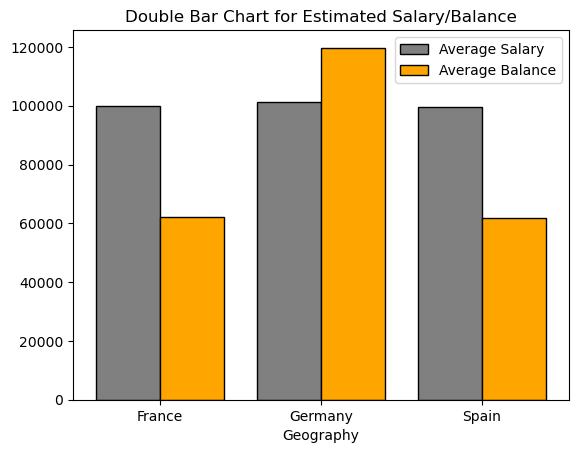

In [60]:
x = np.arange(len(agg_comb['Geography']))  # x positions for categories
width = 0.4  # Width of each bar

# Plot bars
plt.bar(x - width/2, agg_comb['Average Salary'], width=width, label='Average Salary', color='grey', edgecolor='black')
plt.bar(x + width/2, agg_comb['Average Balance'], width=width, label='Average Balance', color='orange', edgecolor='black')
plt.xticks(x, agg_comb['Geography']) 
plt.xlabel('Geography')
plt.title('Double Bar Chart for Estimated Salary/Balance')
plt.legend()
plt.show()

`Observation` : 

- On the average, customers in Germany maintain a higher account balance (120k dollars) compared to customers in Spain and France (62k dollars). 

- The average salary for each country indicates that majority of customers across the 3 countries earn around 100k dollars.

- More customers keep their money with the bank in France and Germany compared to Spain.

#### 2. Customer Type Analysis

 Customer Distribution by Gender  

In [61]:
result = df.groupby('Gender')[['CustomerId']].count()

result

,CustomerId
Gender,
Female,4541
Male,5456


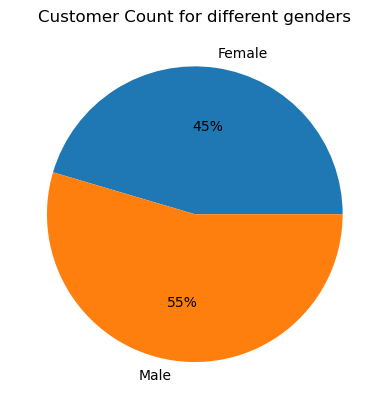

In [62]:
plot_pie(result['CustomerId'], result.index, 'Customer Count for different genders')

Observation: Overall, there are 10% more male customers than female.

Customer Distribution by Age bracket

In [70]:
result = df.groupby('Age Bin')[['CustomerId']].count()

result

,CustomerId
Age Bin,
old,526
young adult,1968
youth,7503


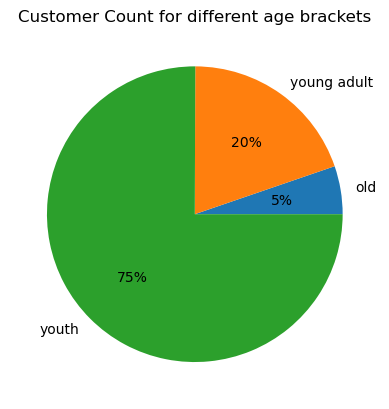

In [71]:
plot_pie(result['CustomerId'], result.index, 'Customer Count for different age brackets')

Result : Most customers (75%) are youths (between the ages 30 - 60 yrs), 20% are young adults (between the ages of 18 and 30) and 5% are old (60 and above)

Where did the customers who exited come from the most

In [72]:
result = df.groupby(['Geography', 'Exited'], as_index=False).size().rename(columns={'size': 'Exited_Count'})
result


,Geography,Exited,Exited_Count
0,France,No,4203
1,France,Yes,810
2,Germany,No,1694
3,Germany,Yes,814
4,Spain,No,2063
5,Spain,Yes,413


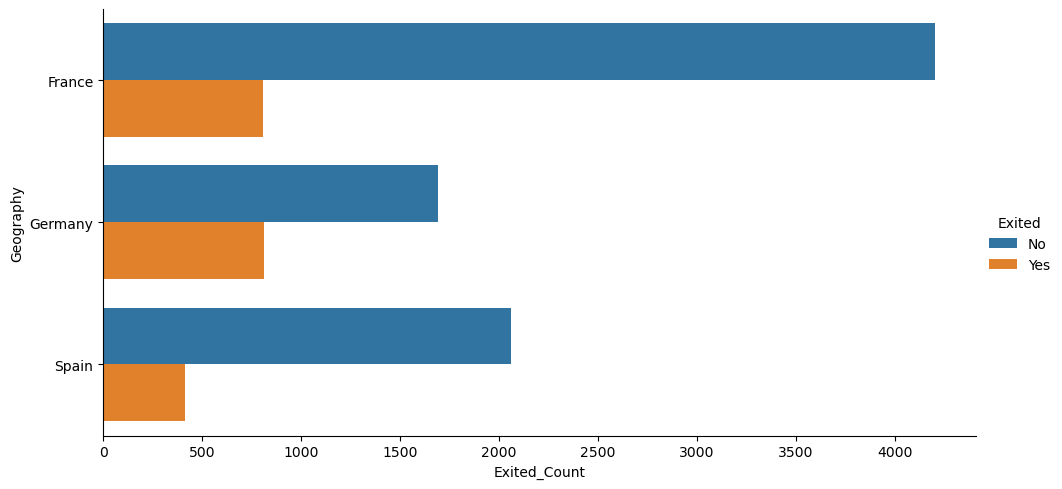

In [73]:
sb.catplot(y='Geography', x='Exited_Count', hue='Exited', kind='bar', data=result, height=5, aspect=2)

In [74]:
# subset exited customers for each country per population - normalize

result_sub = result[result['Exited'] == 'Yes']

result_sub

,Geography,Exited,Exited_Count
1,France,Yes,810
3,Germany,Yes,814
5,Spain,Yes,413


In [75]:
result_countries

,Geography,CustomerId
0,France,5013
1,Germany,2508
2,Spain,2476


In [76]:
result_comb = result_sub.merge(result_countries, how='inner', on='Geography').rename(columns={"CustomerId" : "Population"})
result_comb['Exited per population'] = result_comb['Exited_Count'] / result_comb['Population'] * 100
result_comb = result_comb.sort_values(by='Exited per population', ascending=False)
result_comb

,Geography,Exited,Exited_Count,Population,Exited per population
1,Germany,Yes,814,2508,32.456140
2,Spain,Yes,413,2476,16.680129
0,France,Yes,810,5013,16.157989


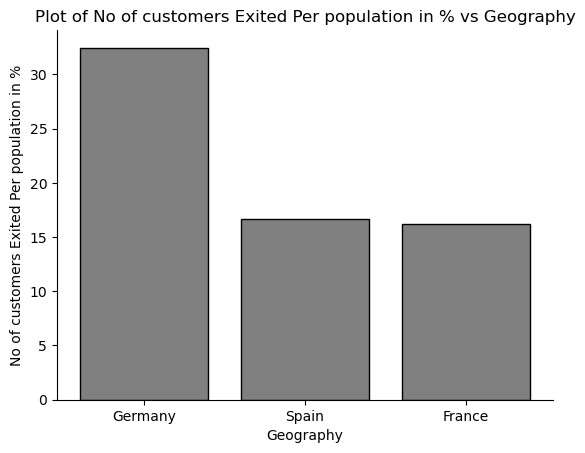

In [77]:
generate_bar_plot(result_comb.Geography, result_comb['Exited per population'], 'Geography', "No of customers Exited Per population in %")

Result : 2x more customers (about 32% of total customers) have churned in Germany compared to Spain and France

- Further observation : Although we have more customers in France, more customers have churned from Germany

#### Customer Engagement Analysis

Customers who have a credit card 

In [78]:
result = df.groupby('HasCrCard', as_index=False).size().rename(columns={'size': 'Count'})

result

,HasCrCard,Count
0,No,4848
1,Yes,5149


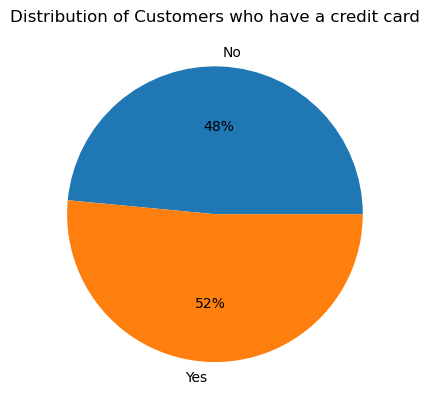

In [79]:
plot_pie(result['Count'], result.HasCrCard, 'Distribution of Customers who have a credit card')

Can we categorize customers using their balance and salary? 

In [80]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Estimated Salary (€),Balance (€),NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited,Credit Score Category,Age Bin
0,15634602,Hargrave,619,France,Female,42,101348.88,0.00,1,Yes,2,Yes,Yes,Fair,youth
2,15647311,Hill,608,Spain,Female,41,112542.58,83807.86,1,Yes,1,Yes,No,Fair,youth
3,15619304,Onio,502,France,Female,42,113931.57,159660.80,3,No,8,No,Yes,Poor,youth
4,15701354,Boni,699,France,Female,39,93826.63,0.00,2,No,1,No,No,Good,youth
5,15737888,Mitchell,850,Spain,Female,43,79084.10,125510.82,1,Yes,2,Yes,No,Excellent,youth


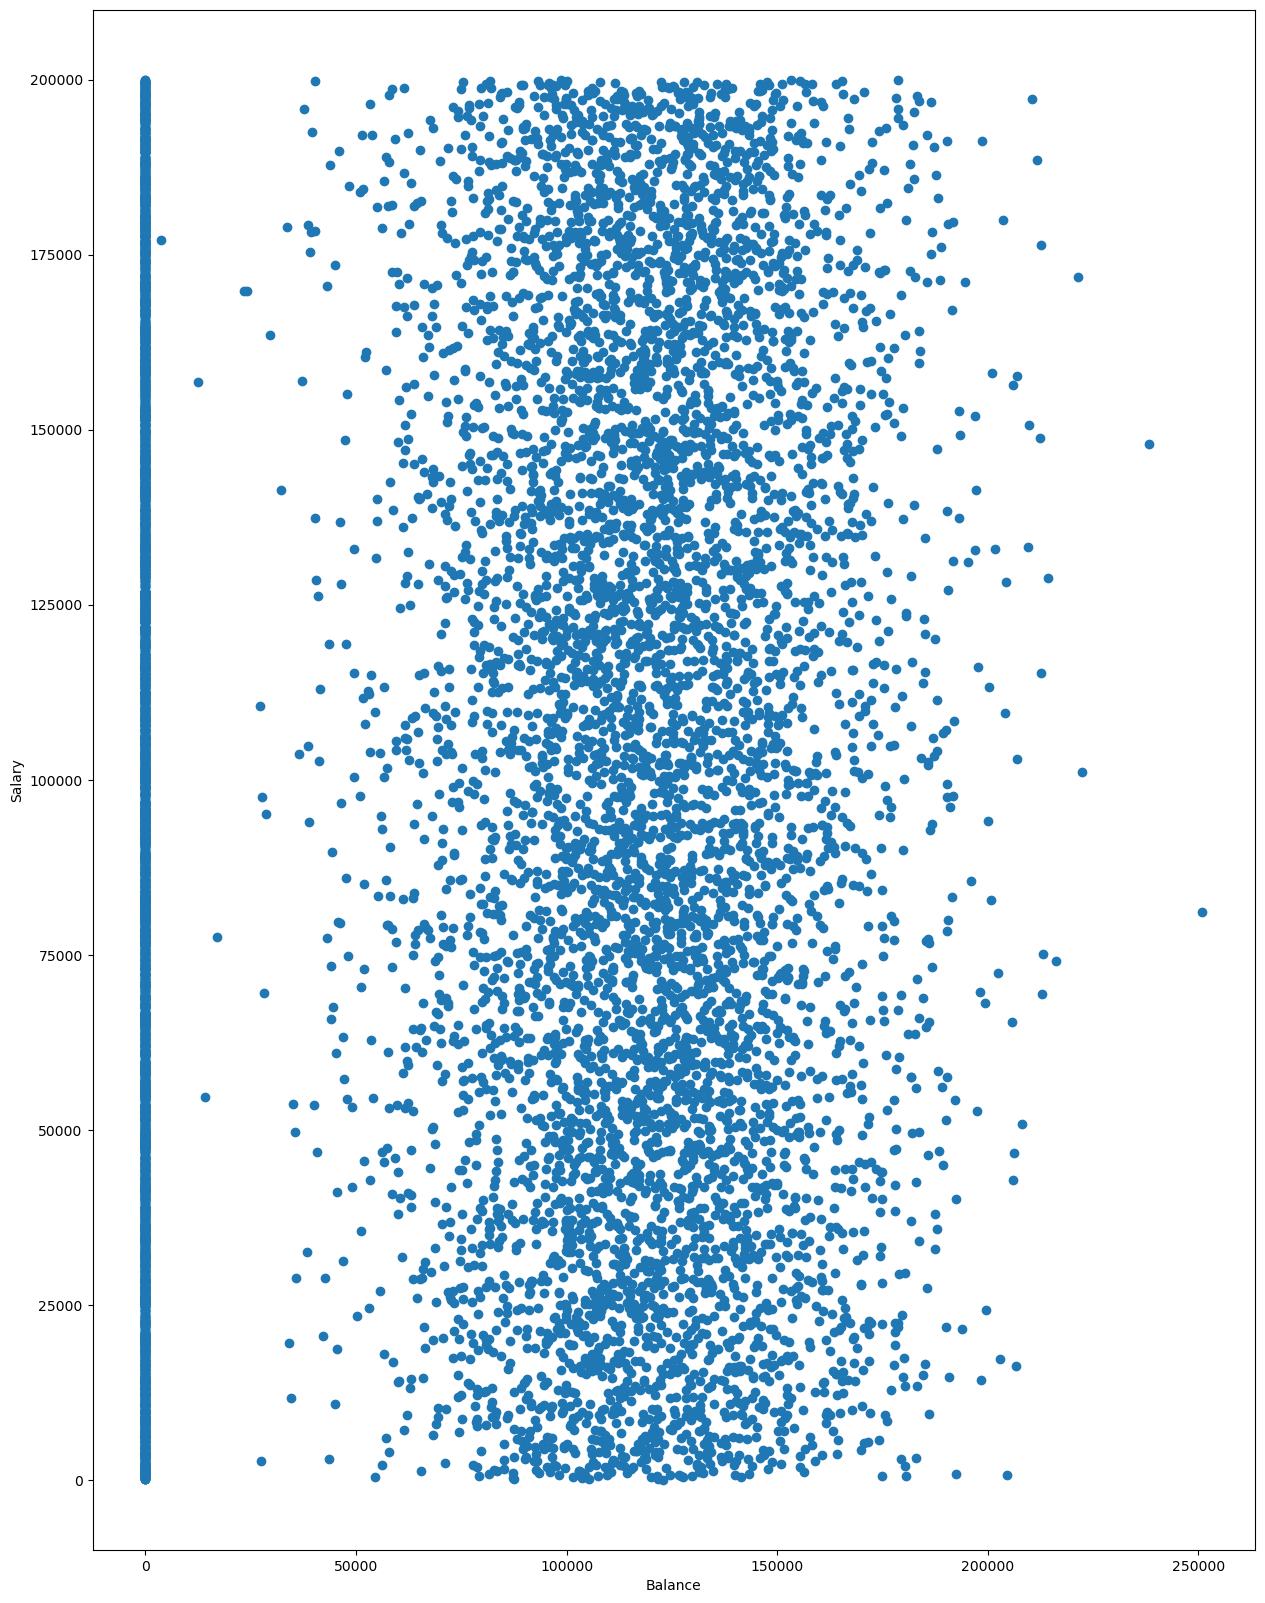

In [81]:
plt.figure(figsize=(15,20))

plt.scatter(y = df['Estimated Salary (€)'], x = df['Balance (€)'])
plt.xlabel('Balance')
plt.ylabel('Salary')
plt.show()

Result: 

Our customers can be divided into 

- Customers who earn but maintain zero balance

- Very few customers who maintain high balance earn medium to high salary

- A large fraction of our customers maintain a balance between 50k euros to 150k euros and they earn from very low to high salary

7. Credit Score Distribution of Customers

In [82]:
result = df.groupby('Credit Score Category', as_index=False).size().rename(columns={'size': 'Count'}).sort_values(by='Count', ascending=False)

result['Percentage of total Customers'] = round(result['Count'] / np.sum(result['Count']) * 100,2)

result

,Credit Score Category,Count,Percentage of total Customers
1,Fair,3331,33.32
2,Good,2427,24.28
3,Poor,2360,23.61
4,Very Good,1224,12.24
0,Excellent,655,6.55


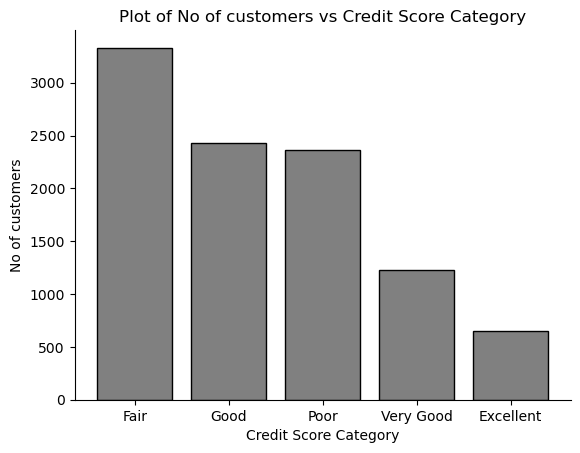

In [83]:
generate_bar_plot(result['Credit Score Category'], result.Count, 'Credit Score Category', "No of customers")

`Result`: Most customers (33%) have a fair credit score (580 - 669). About apprx 7% have an excellent score (> 800)

9. Tenure Distribution for customers

In [85]:
median_tenure = 5


def categorize_tenure(value):
    if value < 2:
        return 'New Customers'
    elif value >= 2 and value <= median_tenure:
        return 'Stable Customers'
    else:
        return 'Premium Customers'
        
df['Tenure Based Customer Category'] = df['Tenure'].apply(categorize_tenure)

In [86]:
result = df.groupby('Tenure Based Customer Category')[['CustomerId']].count()

result  = result.sort_values(by='CustomerId', ascending=False)

In [87]:
result['Percentage of total Customers'] = round(result['CustomerId'] / np.sum(result['CustomerId']) * 100,2)

result

,CustomerId,Percentage of total Customers
Tenure Based Customer Category,,
Premium Customers,4493,44.94
Stable Customers,4056,40.57
New Customers,1448,14.48


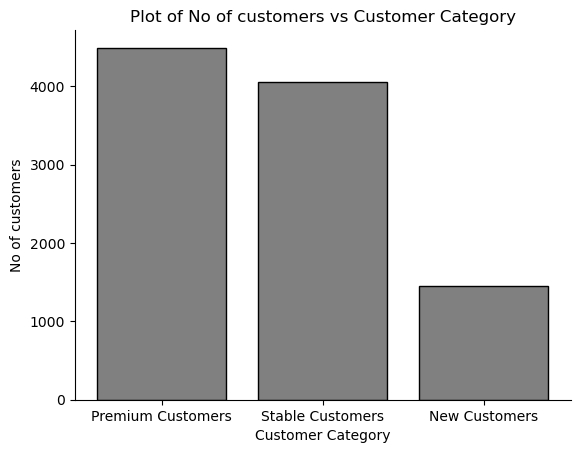

In [88]:
generate_bar_plot(result.index, result.CustomerId, 'Customer Category', "No of customers")

Result : Premium Customers (have a tenure of over 5 yrs) constitute apprx 45% of our customers

10. How does this compare to churn

In [89]:
result = df.groupby(['Tenure Based Customer Category', 'Exited'], as_index=False).size().rename(columns={'size': 'Exited_Count'})
result

,Tenure Based Customer Category,Exited,Exited_Count
0,New Customers,No,1121
1,New Customers,Yes,327
2,Premium Customers,No,3609
3,Premium Customers,Yes,884
4,Stable Customers,No,3230
5,Stable Customers,Yes,826


In [90]:
result['Total Count'] = result.groupby('Tenure Based Customer Category')['Exited_Count'].transform('sum')

In [91]:
result['Percent_Exited'] = result.apply(
    lambda row: (row['Exited_Count'] / row['Total Count'] * 100) if row['Exited'] == 'Yes' else 0, 
    axis=1
)

In [92]:
result = result[result['Exited'] == 'Yes']
result = result.sort_values(by='Percent_Exited', ascending=False)
result

,Tenure Based Customer Category,Exited,Exited_Count,Total Count,Percent_Exited
1,New Customers,Yes,327,1448,22.582873
5,Stable Customers,Yes,826,4056,20.364892
3,Premium Customers,Yes,884,4493,19.675050


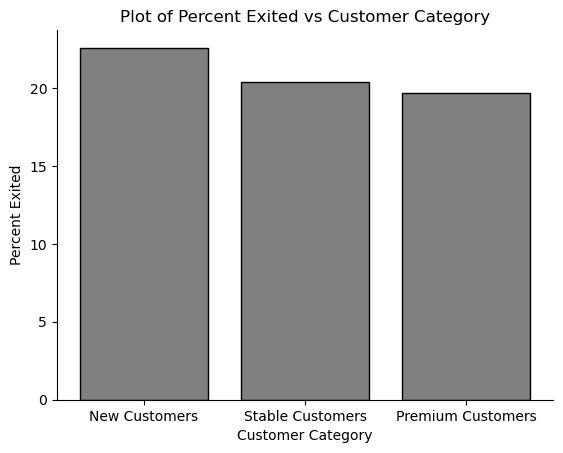

In [93]:
generate_bar_plot(result['Tenure Based Customer Category'], result.Percent_Exited, 'Customer Category', "Percent Exited")

Result : Apprx 23% of new customers have churned , 20% of stable/Premium customers

11. Number of Products Distribution

In [94]:
result = df.groupby('NumOfProducts')[['CustomerId']].count()

result = result.sort_values(by='CustomerId', ascending=False)
result = result.rename(index={1: '1 product', 2: '2 products', 3: '3 products', 4: '4 Products'})

result['Percentage of total Customers'] = round(result['CustomerId'] / np.sum(result['CustomerId']) * 100,2)

result

,CustomerId,Percentage of total Customers
NumOfProducts,,
1 product,5081,50.83
2 products,4590,45.91
3 products,266,2.66
4 Products,60,0.60


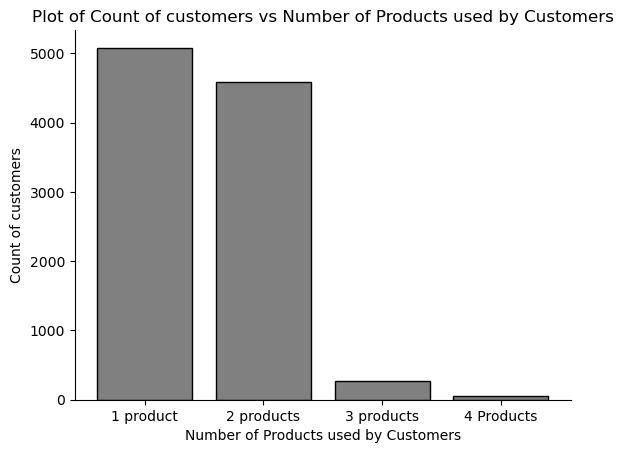

In [95]:
generate_bar_plot(result.index, result.CustomerId, 'Number of Products used by Customers', "Count of customers")

Result : apprx 51% of customers use 1 products, apprx 46% of customers use 2 product, less than 3% use 3 products and less than 1% use 4

12. How Customer Category based on tenure compare to number of products used

In [96]:
agg_data = df.groupby(['NumOfProducts', 'Tenure Based Customer Category'], as_index=False)['CustomerId'].count()

agg_data

,NumOfProducts,Tenure Based Customer Category,CustomerId
0,1,New Customers,804
1,1,Premium Customers,2272
2,1,Stable Customers,2005
3,2,New Customers,602
4,2,Premium Customers,2085
5,2,Stable Customers,1903
6,3,New Customers,38
7,3,Premium Customers,109
8,3,Stable Customers,119
9,4,New Customers,4


Text(0.5, 1.0, 'How Customer Category based on tenure compare to number of products used')

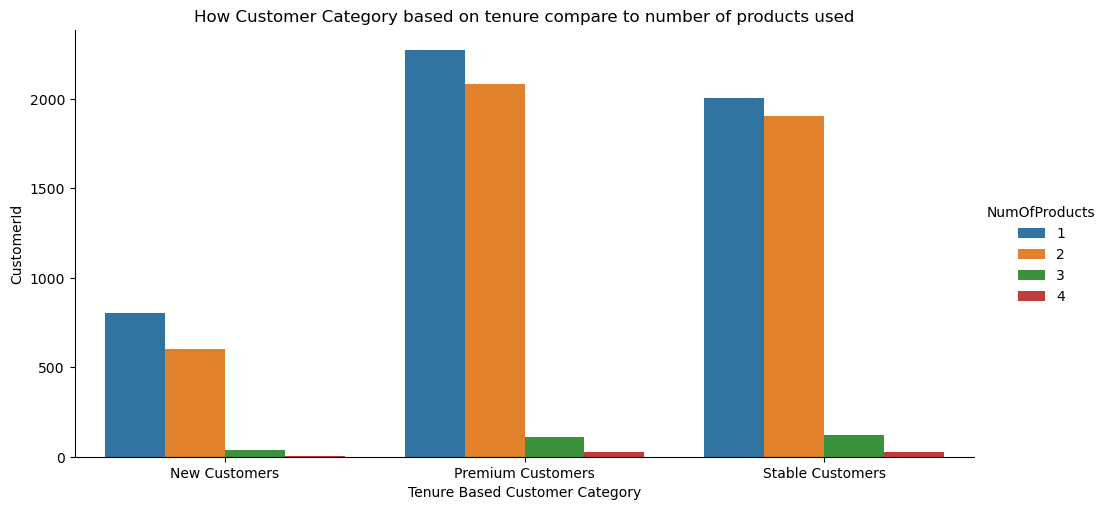

In [97]:
sb.catplot(x='Tenure Based Customer Category', y='CustomerId', hue='NumOfProducts', kind='bar', data=agg_data.sort_values(by='CustomerId'), height=5, aspect=2)
plt.title('How Customer Category based on tenure compare to number of products used')

`Result` : Most customers stick to using 1/2 products even after staying with the bank for a long time

14. Highest earning customers and have the highest balance

In [98]:
# overall customers with the highest account balance
result_bal = df.groupby(['Surname', 'Geography'], as_index=False)['Balance (€)'].sum().sort_values(by='Balance (€)', ascending=False)
result_bal

,Surname,Geography,Balance (€)
3947,Smith,France,1432079.41
2707,Martin,Germany,1396543.12
4402,Walker,Germany,1289170.03
516,Brown,France,1236898.64
4574,Wu,France,1177378.71
...,...,...,...
2522,Locke,France,0.00
2508,Little,France,0.00
2507,Liston,France,0.00
2502,Linger,France,0.00


In [99]:
# overall customers with the highest salaries
result_sal = df.groupby(['Surname', 'Geography'], as_index=False)['Estimated Salary (€)'].sum().sort_values(by='Estimated Salary (€)', ascending=False)
result_sal

,Surname,Geography,Estimated Salary (€)
4612,Yeh,France,2070237.39
3947,Smith,France,1783845.46
2587,Lung,France,1607039.44
4402,Walker,Germany,1526662.01
2625,Maclean,France,1498163.53
...,...,...,...
1724,Groom,France,555.28
391,Binder,France,428.23
1149,Demidov,Spain,417.41
649,Cashin,France,142.81


In [100]:
# top customers with highest salary in each country
top_customers = (
    result_sal.sort_values(by=['Geography', 'Estimated Salary (€)'], ascending=[True,   False]) 
      .groupby('Geography') 
      .head(3) 
)

top_customers

,Surname,Geography,Estimated Salary (€)
4612,Yeh,France,2070237.39
3947,Smith,France,1783845.46
2587,Lung,France,1607039.44
4402,Walker,Germany,1526662.01
2886,Miller,Germany,1064689.32
2707,Martin,Germany,992661.19
2598,Ma,Spain,1074033.71
3823,Scott,Spain,1059015.17
3678,Robertson,Spain,916615.09


In [101]:
# top customers with highest account balance in each country
top_customers = (
    result_bal.sort_values(by=['Geography', 'Balance (€)'], ascending=[True,   False]) 
      .groupby('Geography') 
      .head(3) 
)

top_customers

,Surname,Geography,Balance (€)
3947,Smith,France,1432079.41
516,Brown,France,1236898.64
4574,Wu,France,1177378.71
2707,Martin,Germany,1396543.12
4402,Walker,Germany,1289170.03
4425,Wang,Germany,1112136.12
2598,Ma,Spain,1166382.39
3678,Robertson,Spain,896438.35
688,Ch'iu,Spain,705549.10


`Result` : 

- Overall, the customers with the highest account balances are Smith (France), Martin(Germany) and Walker(Germany).

- Overall, the customers with the highest salaries are Yeh (France), Smith(France) and Lung(France).

By Geography/location,

The customers with the highest account balances 
- In Germany : Maltin, Walker and Wang
- In France : Smith, Brown and Wu
- In Spain : Ma, Robertson and Ch'iu

The customers with the highest salaries
- In Germany : Walker, Miller and Martin
- In France: Yeh, Smith and Lung
- In Spain : Ma, Scoth and Robertson

15. Class of Customers Exiting

In [102]:
# age group
result_age = df.groupby(['Age Bin', 'Exited'], as_index=False)['Exited'].size().rename(columns={'size': 'Exited_Count'}).sort_values('Exited_Count', ascending=False)
result_age = result_age[result_age['Exited'] == 'Yes']

result_age

,Age Bin,Exited,Exited_Count
5,youth,Yes,1742
3,young adult,Yes,148
1,old,Yes,147


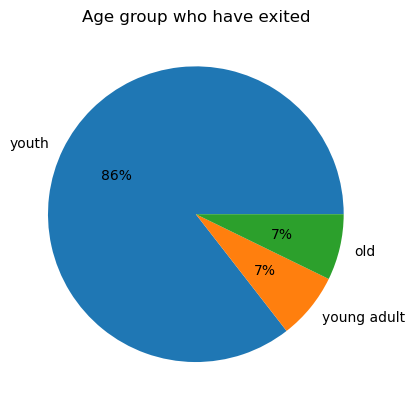

In [103]:
plot_pie(result_age.Exited_Count, result_age['Age Bin'], 'Age group who have exited')

In [111]:
# normalize - percentage of exited age-group divided by total no of age group

age_bin_df = df.groupby(['Age Bin']).agg({'Age Bin' : 'count'}).rename(columns={'Age Bin': 'Count of Age Bracket'}).reset_index()

age_bin_df

,Age Bin,Count of Age Bracket
0,old,526
1,young adult,1968
2,youth,7503


In [113]:
df_merge = age_bin_df.merge(result_age, on = 'Age Bin', how='inner')

df_merge['exited percent'] = (df_merge['Exited_Count']/ df_merge['Count of Age Bracket'] ) * 100

df_merge

,Age Bin,Count of Age Bracket,Exited,Exited_Count,exited percent
0,old,526,Yes,147,27.946768
1,young adult,1968,Yes,148,7.520325
2,youth,7503,Yes,1742,23.217380


`Result` : Relative to the total no of customers in each age bracket,  Apprx 28% of older customers have exited , 23% of youths and 8% of young adults

In [114]:
# Customer Category
result_cat = df.groupby(['Tenure Based Customer Category', 'Exited'], as_index=False)['Exited'].size().rename(columns={'size': 'Exited_Count'}).sort_values('Exited_Count', ascending=False)
result_cat = result_cat[result_cat['Exited'] == 'Yes']

result_cat


,Tenure Based Customer Category,Exited,Exited_Count
3,Premium Customers,Yes,884
5,Stable Customers,Yes,826
1,New Customers,Yes,327


In [115]:
# normalize - percentage of exited tenure based category divided by total no of tenure based category


tenure_bin_df = df.groupby(['Tenure Based Customer Category']).agg({'Tenure Based Customer Category' : 'count'}).rename(columns={'Tenure Based Customer Category': 'Count of Tenure Based Customer Category'}).reset_index()

tenure_bin_df

,Tenure Based Customer Category,Count of Tenure Based Customer Category
0,New Customers,1448
1,Premium Customers,4493
2,Stable Customers,4056


In [116]:
df_merge = tenure_bin_df.merge(result_cat, on = 'Tenure Based Customer Category', how='inner')

df_merge['exited percent'] = (df_merge['Exited_Count']/ df_merge['Count of Tenure Based Customer Category'] ) * 100

df_merge

,Tenure Based Customer Category,Count of Tenure Based Customer Category,Exited,Exited_Count,exited percent
0,New Customers,1448,Yes,327,22.582873
1,Premium Customers,4493,Yes,884,19.675050
2,Stable Customers,4056,Yes,826,20.364892


`Result` New customers are the most affected by churn. Apprx 1 in 5 customers who join would likely churn.  

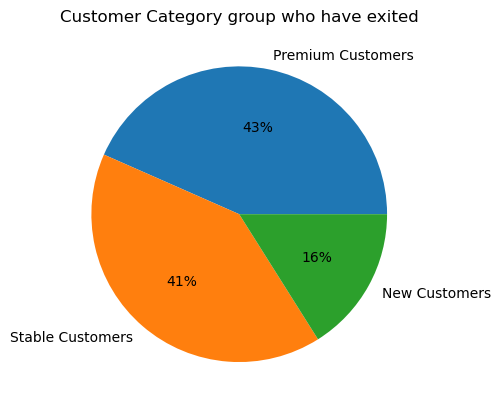

In [98]:
plot_pie(result_cat.Exited_Count, result_cat['Tenure Based Customer Category'], 'Customer Category group who have exited')

In [99]:
# Percentage of customers who have exited overall
result_cat = df.groupby(['Tenure Based Customer Category', 'Exited'], as_index=False)['Exited'].size().rename(columns={'size': 'Exited_Count'}).sort_values('Exited_Count', ascending=False)

percent_exited = result_cat[result_cat['Exited'] == 'Yes']['Exited_Count'].sum() / result_cat['Exited_Count'].sum() * 100
percent_exited


20.376112833850154

In [117]:
# gender type
result_cat = df.groupby(['Gender', 'Exited'], as_index=False)['Exited'].size().rename(columns={'size': 'Exited_Count'}).sort_values('Exited_Count', ascending=False)
result_cat = result_cat[result_cat['Exited'] == 'Yes']

result_cat

,Gender,Exited,Exited_Count
1,Female,Yes,1139
3,Male,Yes,898


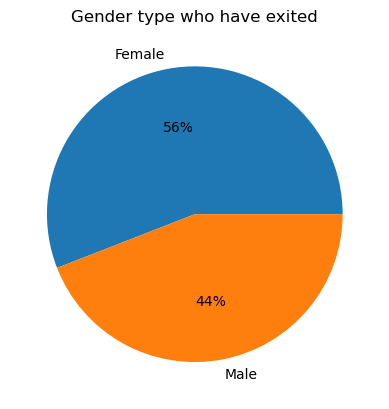

In [118]:
plot_pie(result_cat.Exited_Count, result_cat['Gender'], 'Gender type who have exited')

In [119]:
# has credit card

result_cat = df.groupby(['HasCrCard', 'Exited'], as_index=False)['Exited'].size().rename(columns={'size': 'Exited_Count'}).sort_values('Exited_Count', ascending=False)
result_cat = result_cat[result_cat['Exited'] == 'Yes']

result_cat

,HasCrCard,Exited,Exited_Count
1,No,Yes,1302
3,Yes,Yes,735


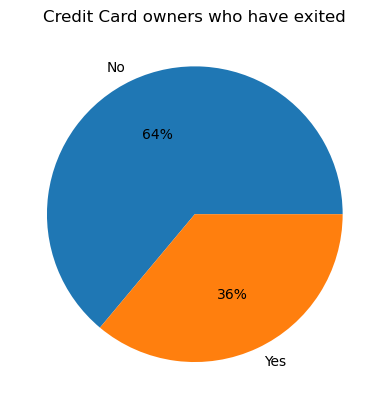

In [120]:
plot_pie(result_cat.Exited_Count, result_cat['HasCrCard'], 'Credit Card owners who have exited')

In [122]:
# no of products 


result_cat = df.groupby(['NumOfProducts', 'Exited'], as_index=False)['Exited'].size().rename(columns={'size': 'Exited_Count'}).sort_values('Exited_Count', ascending=False)
result_cat = result_cat[result_cat['Exited'] == 'Yes']

result_cat

,NumOfProducts,Exited,Exited_Count
1,1,Yes,1409
3,2,Yes,348
5,3,Yes,220
6,4,Yes,60


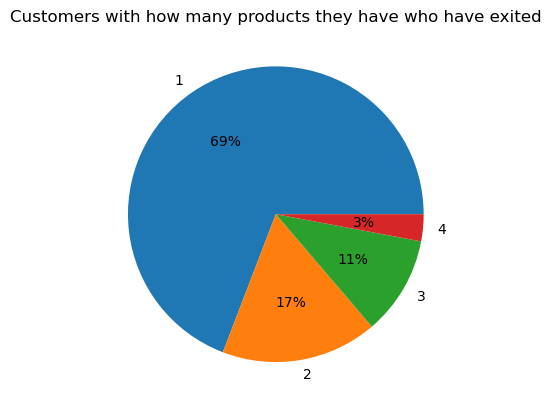

In [123]:
plot_pie(result_cat.Exited_Count, result_cat['NumOfProducts'], 'Customers with how many products they have who have exited')

`Result`:

- More females (56%) have churned

- More customers without credit card (64%) have churned

- Customers with fewer products are more likely to churn